In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing data from github file and converting into a DataFrame 
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
data.head()


,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
data.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Exploratory Data Analysis(EDA)

In [5]:
#finding number of rows and columns
data.shape

(32560, 15)

The dataset has 32560 records and 15 columns.

In [6]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Observations from the above dataset after finding out the statistics of the data:-

1.The difference between mean and standard deviation is appears to be good in Age,Education_num and Hours_per_week. In Fnlwgt column there is not much difference between the mean and standard deviation. And in Capital_gain and Capital_loss the standard deviation is more than the mean which may be because of high variation between values and abnormal distribution of data.

2.The difference between all the quantiles is appears to be good for Age column.

3.The minimum value of Capital_gain and Capital_loss is 0. and also the value is zero for 25, 50 and 75%. Capital_gain and Capital_loss only contain max values.

4.The difference between the minimum value and the 1st quantile for Fnlwgt,Hours_per_week and Education_num is very large. there might be some outliers present in this region.


In [7]:
#finding the null values in each column
data.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

There is no null values present in the dataset.

In [8]:
#no. of columns in the dataset
data.columns


Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [9]:
#checking different datatypes present in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The dataset contains int and object datatype. As a machine learning model can not work on object datatypes so we need to encode the object datatypes values properly.

In [10]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


lets find out the no of unique values in the columns having object datatype and then encode them one by one.

In [11]:

data.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

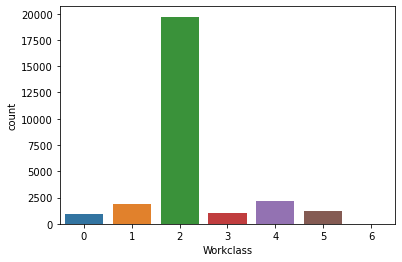

In [109]:
#lets plot the value counts for Workclass(after encoding)
sns.countplot(x='Workclass', data=data, )
plt.show()

In [13]:
data.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

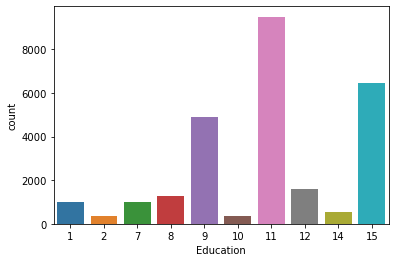

In [110]:
#lets plot the value counts for Education (after encoding)
sns.countplot(x='Education', data=data)
plt.show()

In [15]:
data.Marital_status.unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

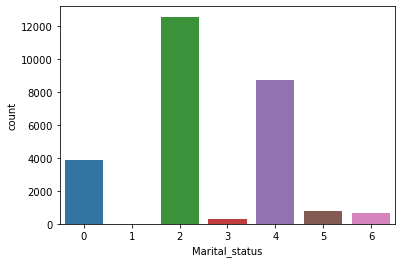

In [111]:
#lets plot the value counts for Marital_status (after encoding)
sns.countplot(x='Marital_status', data=data)
plt.show()

In [17]:
data.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

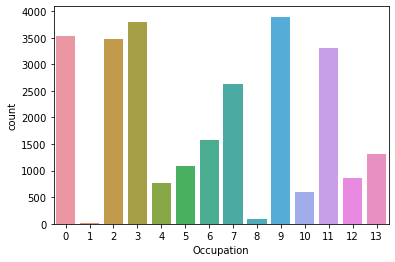

In [112]:
#lets plot the value counts for Occupation (after encoding)
sns.countplot(x='Occupation', data=data)
plt.show()

In [19]:
data.Relationship.unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

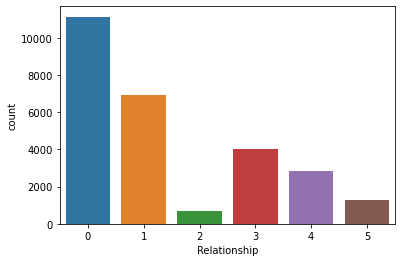

In [113]:
#lets plot the value counts for Relationship (after encoding)
sns.countplot(x='Relationship', data=data)
plt.show()

In [21]:
data.Sex.unique()

array([' Male', ' Female'], dtype=object)

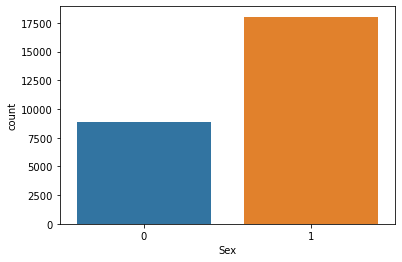

In [115]:
#lets plot the value counts for Sex (after encoding)
sns.countplot(x='Sex', data=data)
plt.show()

In [23]:
data.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

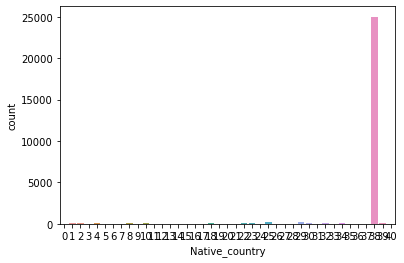

In [117]:
#lets plot the value counts for Native_country (after encoding)
sns.countplot(x='Native_country', data=data)
plt.show()

In [25]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


We can observe some '?' values in different columns, lets findout how amne such values are there and we are considering them as NANs.

In [26]:
data.loc[data.Workclass==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [27]:
data.loc[data.Fnlwgt==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [28]:
data.loc[data.Education==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [29]:
data.loc[data.Age==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [30]:
data.loc[data.Education_num==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [31]:
data.loc[data.Marital_status==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [32]:
data.loc[data.Occupation==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
26,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
68,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
76,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
105,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32529,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32530,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32538,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32540,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [33]:
data.loc[data.Relationship==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [34]:
data.loc[data.Race==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [35]:
data.loc[data.Sex==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [36]:
data.loc[data.Capital_gain==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [37]:
data.loc[data.Hours_per_week==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income


In [38]:
data.loc[data.Native_country==' ?']

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
13,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
37,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
50,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
60,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
92,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32448,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32468,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32491,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32509,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


'?' values are only present in columns workclass,Native_country and Occupation. We can not fill all the '?' values using mode as there will be more number of aspecific kind of value in all those 3 clumns and that may affect in the prediction of the model. so it is better to delete the rows having '?' value.

In [39]:
data.drop(data[data['Native_country'] == ' ?'].index,inplace=True)
data.drop(data[data['Workclass'] == ' ?'].index,inplace=True)
data.drop(data[data['Occupation'] == ' ?'].index,inplace=True)

In [40]:
data.shape

(30161, 15)

now lets check whether the'?' values are deleted

In [41]:

data.Native_country.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [42]:
data.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [43]:
data.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

Now lets encode the values having object datatypes.

In [44]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [45]:
#encoding the region column
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

In [46]:
df2=lab_enc.fit_transform(data['Workclass'])
pd.Series(df2)

data['Workclass']=df2
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,2,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,2,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,2,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,2,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,2,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,2,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,2,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [47]:
df2=lab_enc.fit_transform(data['Education'])
pd.Series(df2)

data['Education']=df2
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,2,215646,11,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,2,234721,1,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,2,338409,9,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,2,284582,12,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,2,154374,11,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,2,151910,11,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,2,201490,11,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [48]:
df2=lab_enc.fit_transform(data['Marital_status'])
pd.Series(df2)

data['Marital_status']=df2
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,2,215646,11,9,0,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,2,234721,1,7,2,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,2,338409,9,13,2,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,2,284582,12,14,2,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,2,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,2,154374,11,9,2,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,2,151910,11,9,6,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,2,201490,11,9,4,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [49]:
df2=lab_enc.fit_transform(data['Occupation'])
pd.Series(df2)

data['Occupation']=df2
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,Husband,White,Male,0,0,13,United-States,<=50K
1,38,2,215646,11,9,0,5,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,2,234721,1,7,2,5,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,2,338409,9,13,2,9,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,2,284582,12,14,2,3,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,2,12,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,2,154374,11,9,2,6,Husband,White,Male,0,0,40,United-States,>50K
32557,58,2,151910,11,9,6,0,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,2,201490,11,9,4,0,Own-child,White,Male,0,0,20,United-States,<=50K


In [50]:
df2=lab_enc.fit_transform(data['Relationship'])
pd.Series(df2)

data['Relationship']=df2
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,White,Male,0,0,13,United-States,<=50K
1,38,2,215646,11,9,0,5,1,White,Male,0,0,40,United-States,<=50K
2,53,2,234721,1,7,2,5,0,Black,Male,0,0,40,United-States,<=50K
3,28,2,338409,9,13,2,9,5,Black,Female,0,0,40,Cuba,<=50K
4,37,2,284582,12,14,2,3,5,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,2,12,5,White,Female,0,0,38,United-States,<=50K
32556,40,2,154374,11,9,2,6,0,White,Male,0,0,40,United-States,>50K
32557,58,2,151910,11,9,6,0,4,White,Female,0,0,40,United-States,<=50K
32558,22,2,201490,11,9,4,0,3,White,Male,0,0,20,United-States,<=50K


In [51]:
df2=lab_enc.fit_transform(data['Race'])
pd.Series(df2)

data['Race']=df2
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,4,Male,0,0,13,United-States,<=50K
1,38,2,215646,11,9,0,5,1,4,Male,0,0,40,United-States,<=50K
2,53,2,234721,1,7,2,5,0,2,Male,0,0,40,United-States,<=50K
3,28,2,338409,9,13,2,9,5,2,Female,0,0,40,Cuba,<=50K
4,37,2,284582,12,14,2,3,5,4,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,2,12,5,4,Female,0,0,38,United-States,<=50K
32556,40,2,154374,11,9,2,6,0,4,Male,0,0,40,United-States,>50K
32557,58,2,151910,11,9,6,0,4,4,Female,0,0,40,United-States,<=50K
32558,22,2,201490,11,9,4,0,3,4,Male,0,0,20,United-States,<=50K


In [52]:
df2=lab_enc.fit_transform(data['Sex'])
pd.Series(df2)

data['Sex']=df2
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,United-States,<=50K
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,United-States,<=50K
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,United-States,<=50K
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,Cuba,<=50K
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,2,12,5,4,0,0,0,38,United-States,<=50K
32556,40,2,154374,11,9,2,6,0,4,1,0,0,40,United-States,>50K
32557,58,2,151910,11,9,6,0,4,4,0,0,0,40,United-States,<=50K
32558,22,2,201490,11,9,4,0,3,4,1,0,0,20,United-States,<=50K


In [53]:
df2=lab_enc.fit_transform(data['Native_country'])
pd.Series(df2)

data['Native_country']=df2
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,<=50K
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,<=50K
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,<=50K
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,<=50K
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,<=50K
32556,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,>50K
32557,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,<=50K
32558,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,<=50K


In [54]:
df2=lab_enc.fit_transform(data['Income'])
pd.Series(df2)

data['Income']=df2
data

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [55]:
data.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0


Now all the columns having object datatypes are converted into integer values. so now we can visualize the data.

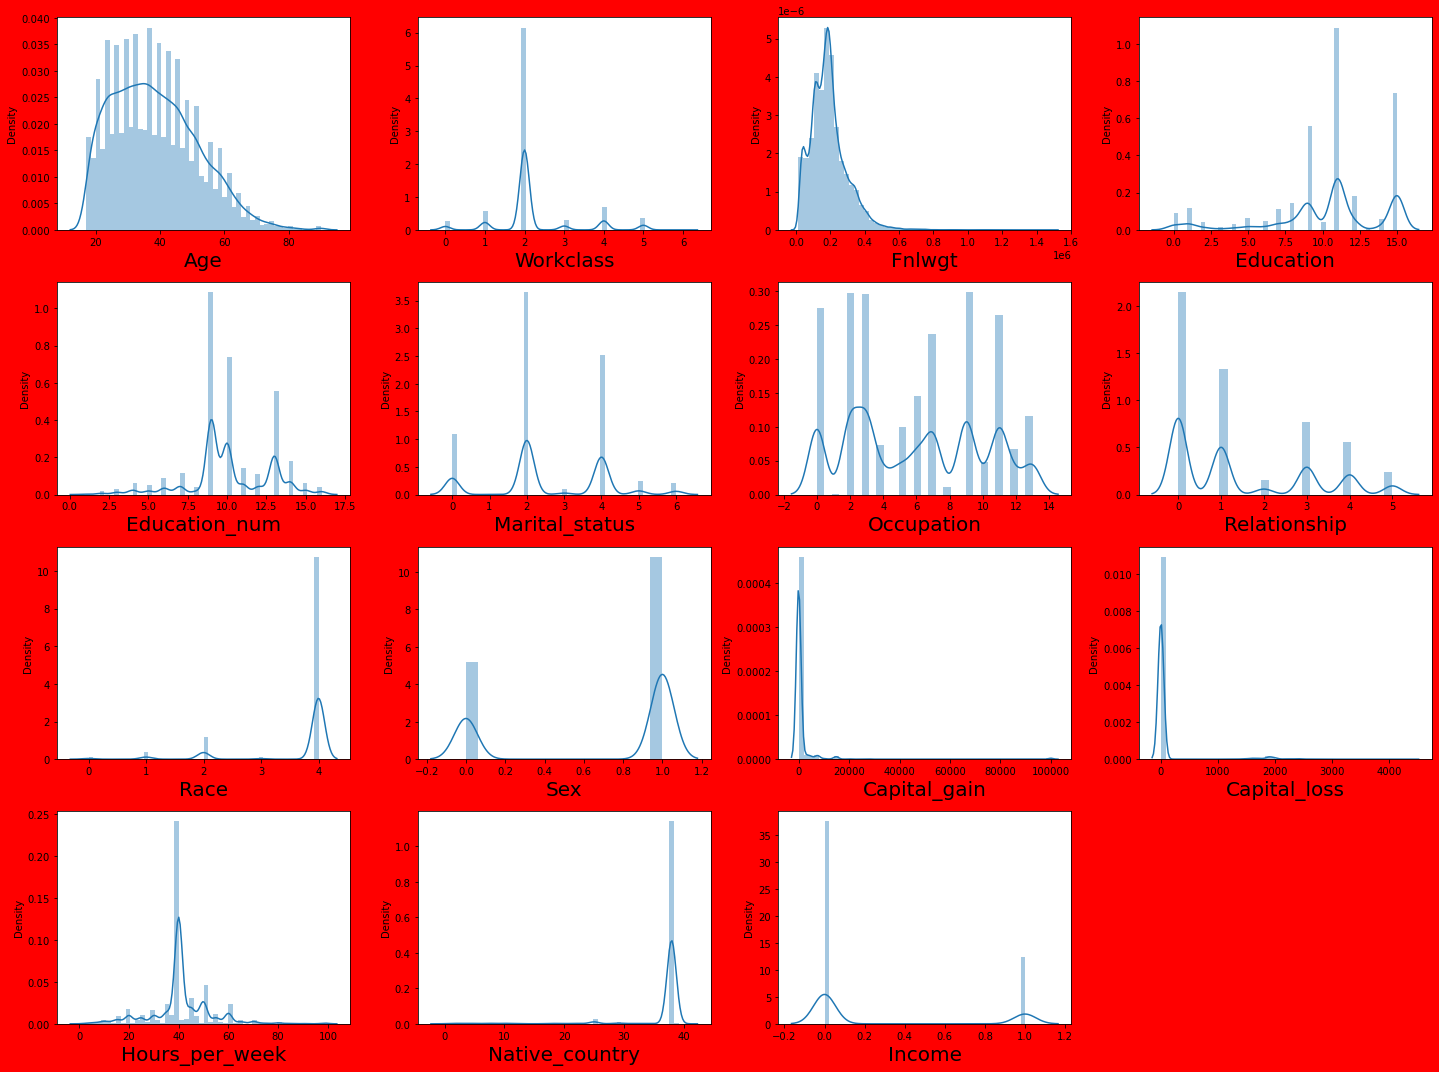

In [56]:
# now the data looks good and there is no missing values so we can start visualizing the type of distribution for each feature
# we will only evaluate the type of distribution for features having continious data here

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=15:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

1.The data distribution does not look decent enough for most of the features i.e. it does not show normal distribution for most of the features(the curve is not bell shaped) except Age. 

2.We can observe that some features like Fnlwgt,Education_number, Capital_gain,Capital_loss and Hours_per_week are little bit skewed. 

3.We do not need to consider features like Workclass, Education,Marital_status,Occupation,Relationship,Race,Sex and Native_country as they have catagorical data.

4.now lets check whether they have outliers in the distribution by plotting box plots.

In [57]:
#checking for outliers in all the features
df_features=data.drop('Income', axis=1)

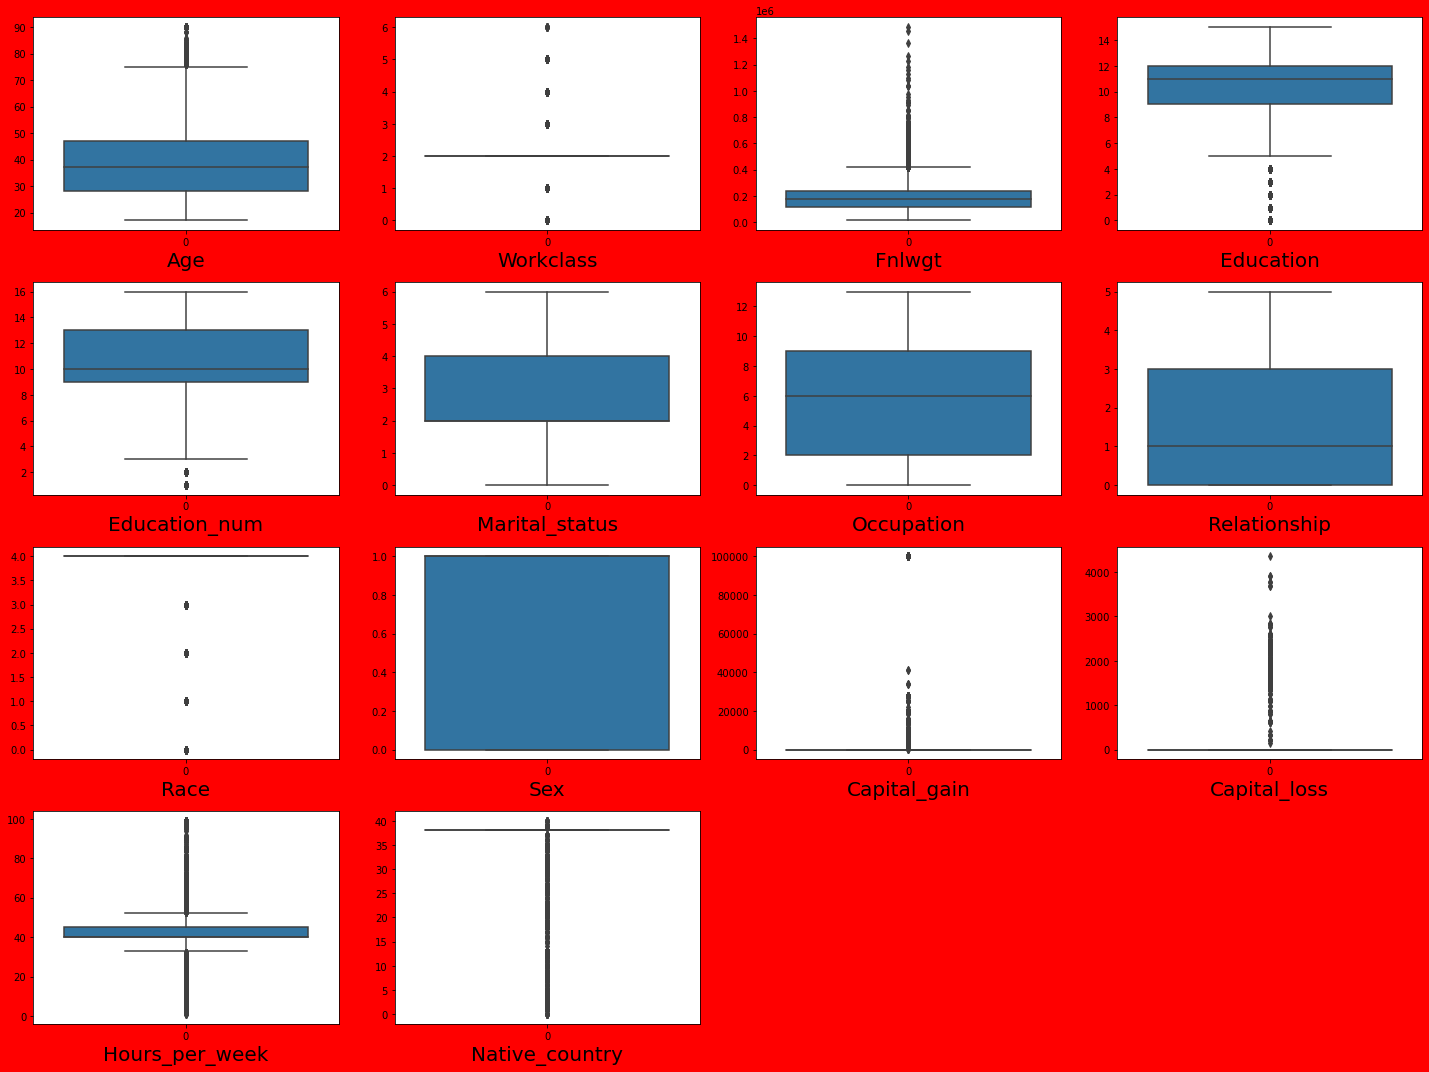

In [58]:
# checking for the outliers by ploting box plots

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in df_features:
    if plotnumber<=14:
        plt.subplot(4,4,plotnumber)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

observations from the box plot.

1.Age has outliers between 80 and 90.

2.Workclass has outliers between 0 , 1 and 3, 6. it has outliers in both sides.

3.Fnlwgt has outliers between 0.4 and 1.4.

4.Education has outliers between 0 and 4.

5.Education_num has outliers between 0 and 4.

6.Race has outliers betweeen 0 to 3.	

7.Capital_gain has outliers between 20000 and 100000.	

8.Capital_loss	has outliers between 0 to 4000.

9.Hours_per_week has outliers between o to 30 and 55 to 100.

10.Native_country has also a lot of outliers in both sides.


we can not remove the outliers in capital gain and capital loss as both have many zero values and gain and loss can not be in a range. they can be anything depending upon the situation.

For columns having catagorical data we will not remove the outliers as they need to be present during model building.
and for rest columns having continious data lets see if we can remove the outliers.

In [59]:
#Lets plot some more graphs to have a better understanding of the data 
#correlation between the features and labels

y=data['Income']
x=data.drop(columns=['Income'])

In [60]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,2,12,5,4,0,0,0,38,38
32556,40,2,154374,11,9,2,6,0,4,1,0,0,40,38
32557,58,2,151910,11,9,6,0,4,4,0,0,0,40,38
32558,22,2,201490,11,9,4,0,3,4,1,0,0,20,38


In [61]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 30161, dtype: int32

In [62]:
#finding the corelation between the features in the data set
data.corr()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.080548,-0.076511,-0.001111,0.043525,-0.276378,-0.005680,-0.246456,0.023373,0.081992,0.080154,0.060166,0.101599,-0.001905,0.242000
Workclass,0.080548,1.000000,-0.032395,0.017892,0.037729,-0.034338,0.015719,-0.067401,0.044700,0.074917,0.035340,0.007226,0.050738,0.007644,0.018103
Fnlwgt,-0.076511,-0.032395,1.000000,-0.027115,-0.044954,0.032197,0.000152,0.009289,-0.023882,0.025387,0.000427,-0.009757,-0.022889,-0.066709,-0.008978
Education,-0.001111,0.017892,-0.027115,1.000000,0.345431,-0.040654,-0.038231,-0.012720,0.011158,-0.027880,0.030577,0.015025,0.059887,0.078794,0.078981
Education_num,0.043525,0.037729,-0.044954,0.345431,1.000000,-0.063457,0.087778,-0.091928,0.032791,0.006131,0.124413,0.079656,0.152528,0.091547,0.335317
Marital_status,-0.276378,-0.034338,0.032197,-0.040654,-0.063457,1.000000,0.022702,0.177975,-0.068641,-0.119837,-0.042424,-0.035197,-0.189004,-0.025911,-0.193504
Occupation,-0.005680,0.015719,0.000152,-0.038231,0.087778,0.022702,1.000000,-0.053742,0.000736,0.062350,0.022170,0.014597,0.018362,-0.003470,0.051551
Relationship,-0.246456,-0.067401,0.009289,-0.012720,-0.091928,0.177975,-0.053742,1.000000,-0.117140,-0.584876,-0.058258,-0.063569,-0.257851,-0.010806,-0.251009
Race,0.023373,0.044700,-0.023882,0.011158,0.032791,-0.068641,0.000736,-0.117140,1.000000,0.089178,0.014351,0.023520,0.048533,0.124511,0.071666
Sex,0.081992,0.074917,0.025387,-0.027880,0.006131,-0.119837,0.062350,-0.584876,0.089178,1.000000,0.048811,0.047017,0.231272,0.000612,0.216715


In [63]:
#sorting the correlation values of averageprice with all the columns
data.corr()['Income'].sort_values()

Relationship     -0.251009
Marital_status   -0.193504
Fnlwgt           -0.008978
Workclass         0.018103
Native_country    0.023273
Occupation        0.051551
Race              0.071666
Education         0.078981
Capital_loss      0.150050
Sex               0.216715
Capital_gain      0.221200
Hours_per_week    0.229480
Age               0.242000
Education_num     0.335317
Income            1.000000
Name: Income, dtype: float64

To get a more clear view lets plot the heat map. we can get all the correlation there

<AxesSubplot:>

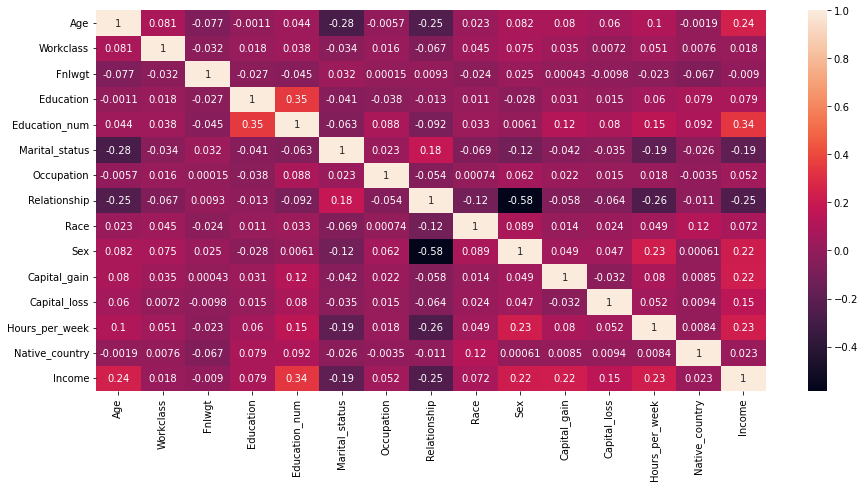

In [64]:
#now lets find out the co relation using heatmap plot.
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(),annot=True)

It seems like the features have not very much correlation with the label(Income).

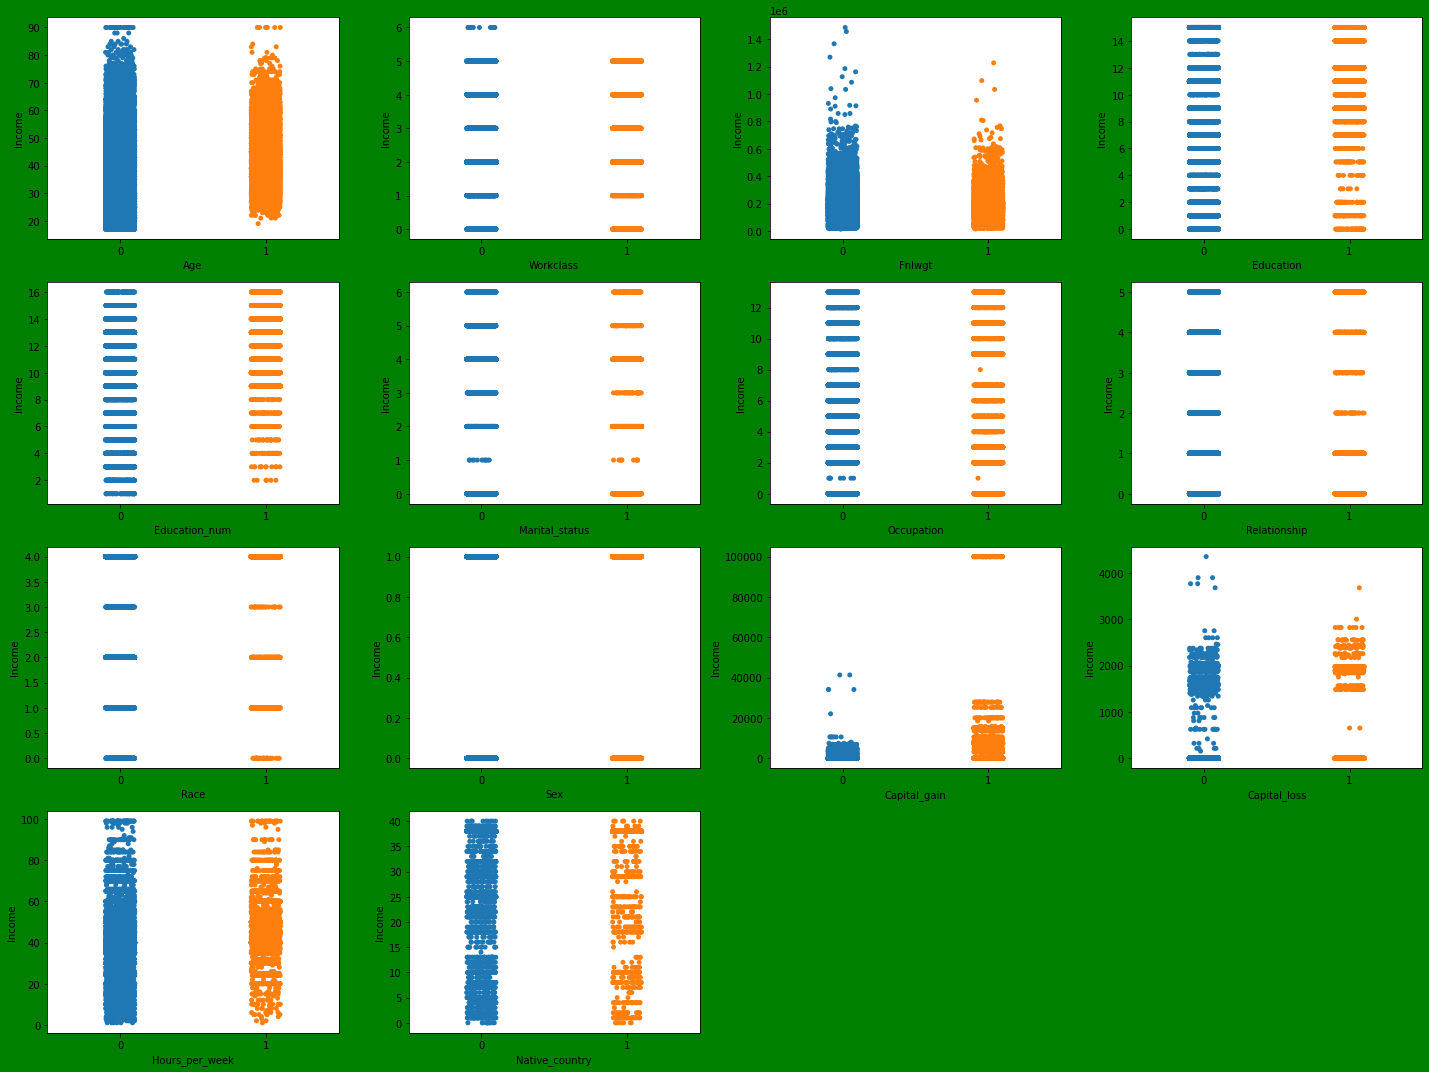

In [65]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.stripplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Income',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

The trend is not clear here, so lets plot the regplot for a better view of the trend in relationship between the features and the label.

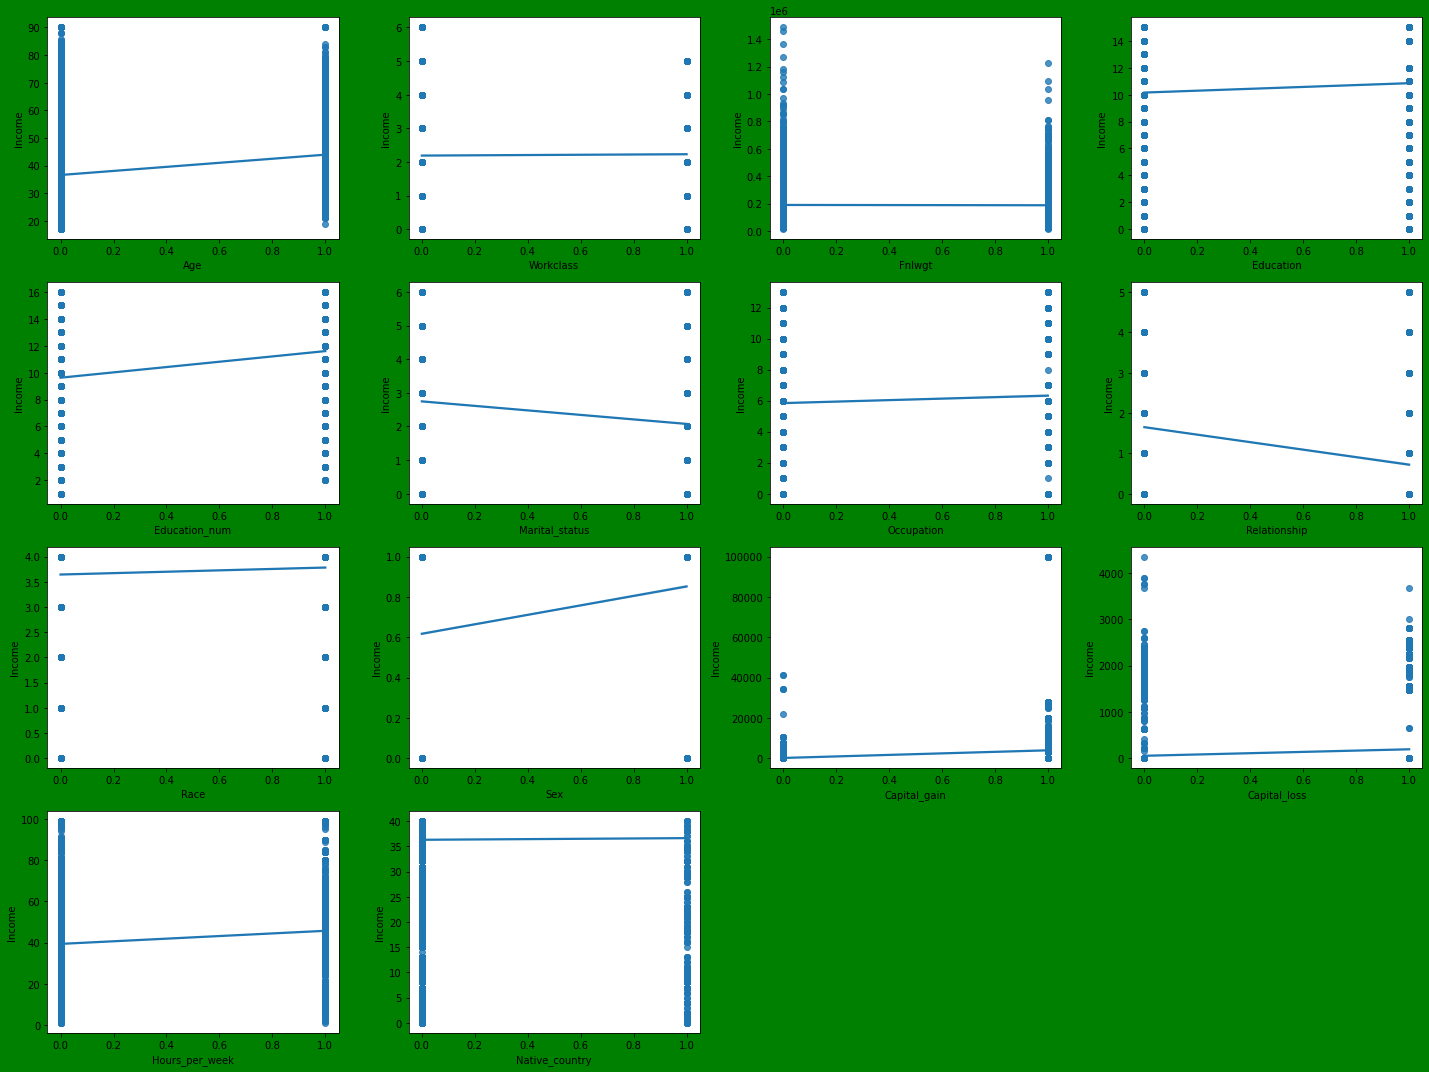

In [66]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=14:
        ax=plt.subplot(4,4,plotnumber)
        sns.regplot(y,x[column])
        plt.xlabel(column, fontsize=10)
        plt.ylabel('Income',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

observations from the regplot

1.Age,Education_num,Sex and Hours_per_week are positively co-related with label(Income) as the trend is in upward direction.

2.Maritial_status,Workclass,Fnlwgt and relationship are negatively co-related with the the label(Income ) as trend is  downward.

3.region does not show any correlation with label(Income).

4.Rest all the features are weakly corelated with the label(Income) as the trend is neither completely upward nor downward.


In [67]:
#assigning our datset to a new variable for testing the feasibility after removing the outliers
df=data

In [68]:
#Finding the IQR(Inter Quantile range) to finding the outliers

#1st quantile
q1=df.quantile(0.25)
#3rd quantile
q3=df.quantile(0.75)

#IQR
iqr=q3 -q1

iqr

Age                   19.0
Workclass              0.0
Fnlwgt            120002.0
Education              3.0
Education_num          4.0
Marital_status         2.0
Occupation             7.0
Relationship           3.0
Race                   0.0
Sex                    1.0
Capital_gain           0.0
Capital_loss           0.0
Hours_per_week         5.0
Native_country         0.0
Income                 0.0
dtype: float64

In [69]:
df.shape


(30161, 15)

In [70]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0


In [71]:
#removing the outliers for Age
age_high=q3.Age + (1.5 * iqr.Age)


index=np.where(df['Age'] > age_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(29992, 15)


,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29987,32555,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
29988,32556,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
29989,32557,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
29990,32558,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [72]:
#removing the outliers for Fnlwgt
fnl_high=q3.Fnlwgt + (1.5 * iqr.Fnlwgt)


index=np.where(df['Fnlwgt'] > fnl_high)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(29090, 15)


,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29085,32555,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
29086,32556,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
29087,32557,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
29088,32558,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [73]:
#removing the outliers for Education_num
edu_low=q3.Education_num - (1.5 * iqr.Education_num)


index=np.where(df['Education_num'] < edu_low)

df=df.drop(df.index[index])
print(df.shape)

df.reset_index()

(26928, 15)


,index,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26923,32555,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
26924,32556,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
26925,32557,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
26926,32558,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [74]:
data=df

In [75]:
data.shape


(26928, 15)

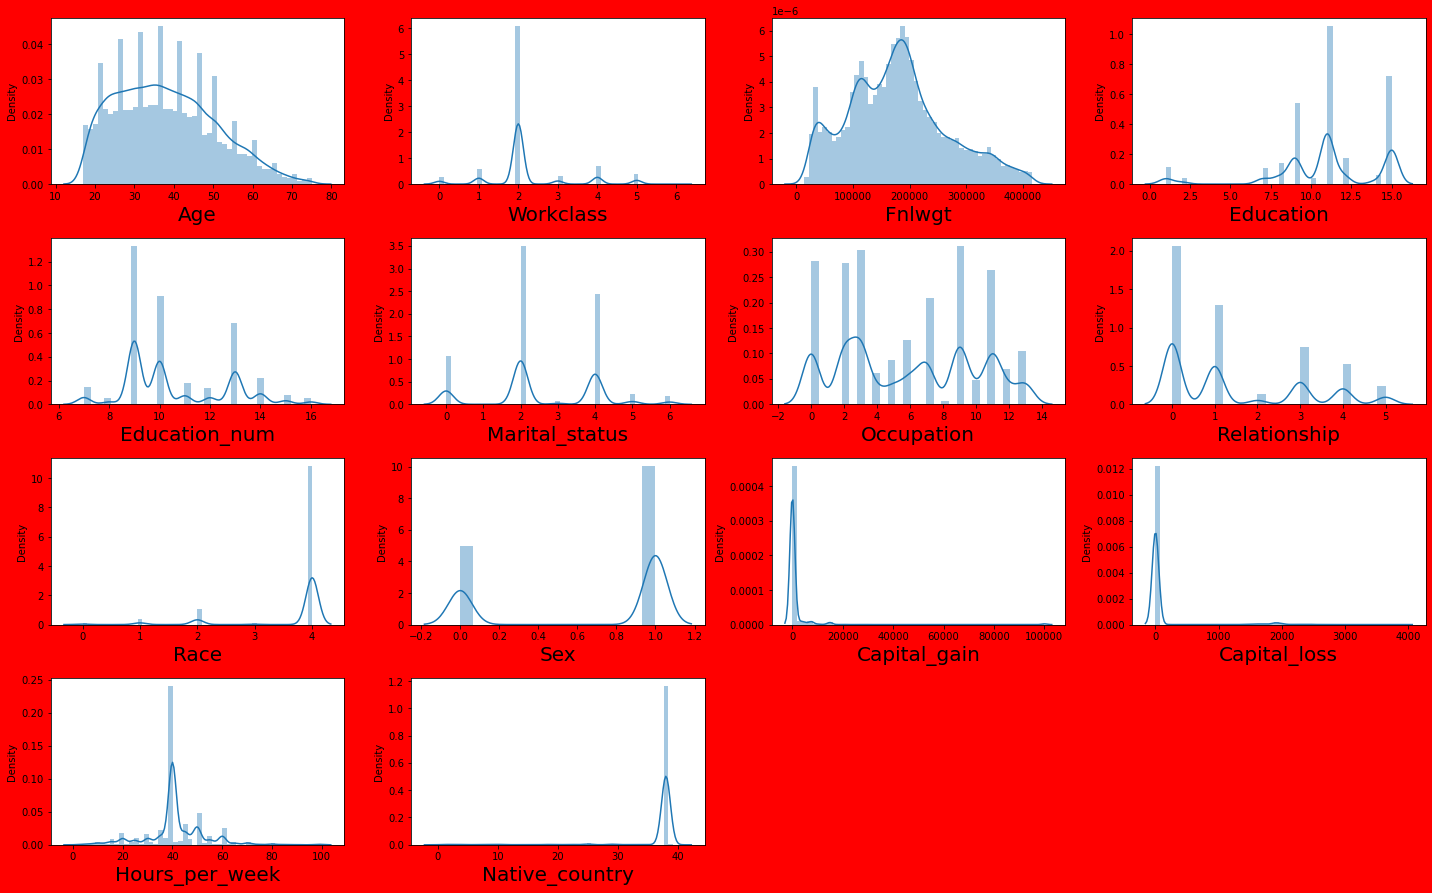

In [76]:
#now lets check if the outliers are removed
plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=14:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

now the distribution is looking somewhat better as compared to before when outliers were not removed.

In [77]:
y=data['Income']
x=data.drop(columns=['Income'])

In [78]:
data.shape

(26928, 15)

In [79]:
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,4,83311,9,13,2,3,0,4,1,0,0,13,38
1,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
2,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
3,28,2,338409,9,13,2,9,5,2,0,0,0,40,4
4,37,2,284582,12,14,2,3,5,4,0,0,0,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,2,257302,7,12,2,12,5,4,0,0,0,38,38
32556,40,2,154374,11,9,2,6,0,4,1,0,0,40,38
32557,58,2,151910,11,9,6,0,4,4,0,0,0,40,38
32558,22,2,201490,11,9,4,0,3,4,1,0,0,20,38


In [80]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income, Length: 26928, dtype: int32

In [81]:
#using standard scalar for scaling the model
from sklearn.preprocessing import StandardScaler
scalar= StandardScaler()
x_scaled=scalar.fit_transform(x)

In [82]:
x_scaled.shape[1]

14

Finding the variance inflation factor (VIF) for each scaled column to know about the multi-colinerity


In [83]:
#computing vif for all the features
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif['Features']=x.columns


vif

,VIF,Features
0,1.186374,Age
1,1.015564,Workclass
2,1.007783,Fnlwgt
3,1.008155,Education
4,1.091754,Education_num
5,1.139450,Marital_status
6,1.024397,Occupation
7,1.681951,Relationship
8,1.041126,Race
9,1.575176,Sex


Observations after finding the  variance inflation factor 

 all the features have a VIF score between 1 and 5 so they are moderately multi colinear. No feature is highly multicolinear with another feature in the dataset.



Now as the label or the target variable is not a continuous data but a catagorical data so this is a classification problem. We will be building some classification algorithms for this problem and we will find out the best machine learning model among them.

# Building classification models for predicting the Income and selecting the best model among them

In [84]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=488)
y_train.head()


18596    1
4971     1
18323    0
12808    1
25096    0
Name: Income, dtype: int32

In [85]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [86]:
lr=LogisticRegression() 
knn=KNeighborsClassifier() 
dtc=DecisionTreeClassifier() 
rfc=RandomForestClassifier()   
svm=SVC()                 

In [87]:
models = [lr, knn, dtc, svm, rfc]
for m in models:
    print (m)
    m.fit(x_train, y_train)
    y_pred = m.predict(x_test)
    print (accuracy_score(y_test, y_pred))
    print (confusion_matrix(y_test, y_pred))
    print (classification_report(y_test, y_pred))

LogisticRegression()
0.8054070112893642
[[4558  352]
 [ 958  864]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      4910
           1       0.71      0.47      0.57      1822

    accuracy                           0.81      6732
   macro avg       0.77      0.70      0.72      6732
weighted avg       0.79      0.81      0.79      6732

KNeighborsClassifier()
0.8077837195484254
[[4357  553]
 [ 741 1081]]
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      4910
           1       0.66      0.59      0.63      1822

    accuracy                           0.81      6732
   macro avg       0.76      0.74      0.75      6732
weighted avg       0.80      0.81      0.80      6732

DecisionTreeClassifier()
0.7961972667855021
[[4211  699]
 [ 673 1149]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4910
           1       0.62      0

Here we can see that RandaomForestClassifier() gives thee best accuracy score. now lets plot the ROC AUC curve to know about the best fitted model.

In [88]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve

print(roc_auc_score(y_test,lr.predict(x_test)))
print(roc_auc_score(y_test,knn.predict(x_test)))
print(roc_auc_score(y_test,dtc.predict(x_test)))
print(roc_auc_score(y_test,rfc.predict(x_test)))
print(roc_auc_score(y_test,svm.predict(x_test)))

0.7012568717709103
0.7403383851142743
0.7441315803005135
0.7744950268387507
0.7425136541165791


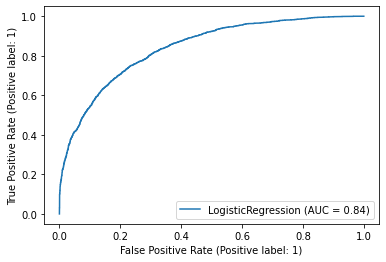

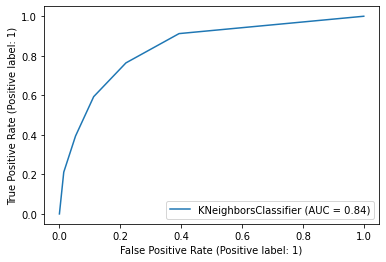

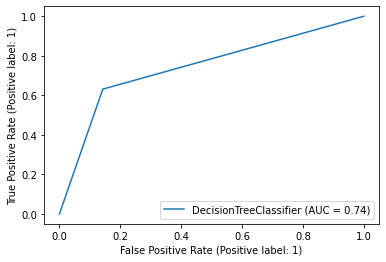

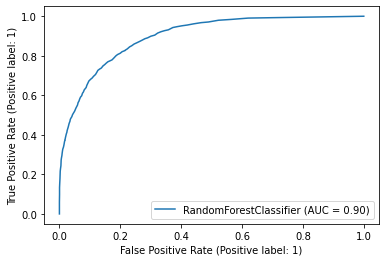

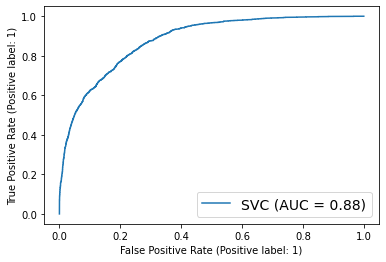

In [89]:

plot_roc_curve(lr,x_test,y_test)  
plot_roc_curve(knn,x_test,y_test)
plot_roc_curve(dtc,x_test,y_test)
plot_roc_curve(rfc,x_test,y_test)
plot_roc_curve(svm,x_test,y_test)
plt.legend(prop = {'size':14}, loc ='lower right')

The RandomForestClassifier() gives the best AUC score of 90. 

# Cross validation scores for all models

In [90]:

for m in models:
    c_v= cross_val_score(m, x_scaled, y, cv = 10)
    print ('Cross Validation Score for ',m, ' is :', c_v.mean())
    print (' ')


Cross Validation Score for  LogisticRegression()  is : 0.8102349716313662
 
Cross Validation Score for  KNeighborsClassifier()  is : 0.8148394605131679
 
Cross Validation Score for  DecisionTreeClassifier()  is : 0.7992429329465142
 
Cross Validation Score for  SVC()  is : 0.835524272107147
 
Cross Validation Score for  RandomForestClassifier()  is : 0.8446228982850812
 


We have concluded that the RandomForestClassifier() is the best model based on the accuracy, Auc value and Crossvalidation scores of all the models. So now lets use RandomForestClassifier() for further evaluation and lets check whether we can improve the accuracy of the model by using Hyperparameter tuning using GridSearchCV.

# Hyperparameter Tuning

In [91]:
#performing hyperparameter tuning for Random Forest Classifier method
from sklearn.model_selection import GridSearchCV
param_grid={'max_features':['auto', 'sqrt'],'min_samples_leaf':[1,2,4,6],'n_estimators':[2,4,6,8,14,17],'criterion' :['gini', 'entropy']}

In [92]:
gridsearch=GridSearchCV(estimator= rfc , param_grid=param_grid )

In [93]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'n_estimators': [2, 4, 6, 8, 14, 17]})

In [94]:
gridsearch.best_params_

{'criterion': 'entropy',
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'n_estimators': 14}

In [95]:
rfc=RandomForestClassifier(max_features='sqrt', min_samples_leaf=6,n_estimators=17,criterion='entropy')

In [96]:
rfc.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=6, n_estimators=17)

In [97]:
data.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,2,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,2,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,2,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,2,201490,11,9,4,0,3,4,1,0,0,20,38,0
32559,52,3,287927,11,9,2,3,5,4,0,15024,0,40,38,1


In [98]:
#prediction of Income 
print('Income value is ', rfc.predict(scalar.transform([[27,2,257302,7,12,2,12,5,4,0,0,0,38,38]])))

Income value is  [0]


In [99]:
y_pred=rfc.predict(x_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [100]:
#printing the confusion matrix
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[4558,  352],
       [ 713, 1109]], dtype=int64)

In [101]:
#printing the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      4910
           1       0.76      0.61      0.68      1822

    accuracy                           0.84      6732
   macro avg       0.81      0.77      0.79      6732
weighted avg       0.84      0.84      0.84      6732



The accuracy score has not increased after using hyperparameter tuning.

In [102]:
#plotting Auc roc curve
print(roc_auc_score(y_test,rfc.predict(x_test)))

0.7684906807720081


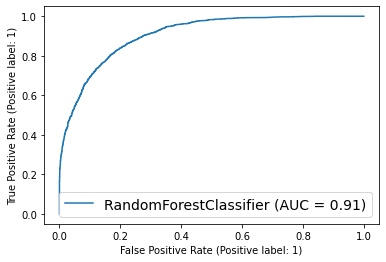

In [103]:
plot_roc_curve(rfc,x_test,y_test)
plt.legend(prop = {'size':14}, loc ='lower right')

In [104]:
#cross validation score
from sklearn.model_selection import cross_val_score
cross_val_score(rfc,x_scaled,y,cv=10)

array([0.8440401 , 0.85443743, 0.84775343, 0.84329744, 0.84589677,
       0.85592276, 0.8496101 , 0.86037876, 0.8551263 , 0.85326895])

In [105]:
cross_val_score(RandomForestClassifier(),x_scaled,y,cv=10).mean()

0.8429516786959091

# Saving the model

In [107]:
#saving the machine learning model
import pickle
filename='finalized_model.pickle4'
pickle.dump(rfc,open('finalized_model.pickle4','wb'))